In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [70]:
data = pd.read_csv('./data/insurance.csv')

In [71]:
data.sample(6)

,age,sex,bmi,children,smoker,region,charges
202,60,female,24.035,0,no,northwest,13012.20865
819,33,female,35.530,0,yes,northwest,55135.40209
867,57,male,43.700,1,no,southwest,11576.13000
892,54,male,24.035,0,no,northeast,10422.91665
651,53,female,39.600,1,no,southeast,10579.71100
750,37,female,26.400,0,yes,southeast,19539.24300


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


*Numerical Variables*
- Age
- BMI
- Charges
  
*Categorical Variables*
- sex
- children
- smoker
- region

In [73]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [74]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Exploratory Data Analysis

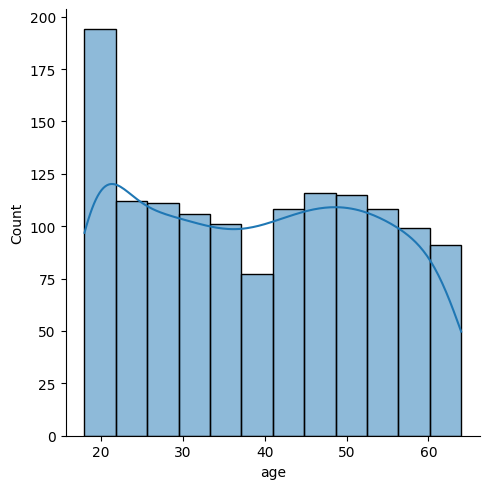

In [75]:
sns.displot(data,x='age',kde=True)

We must look to tranform this column so as to give a better linear model.

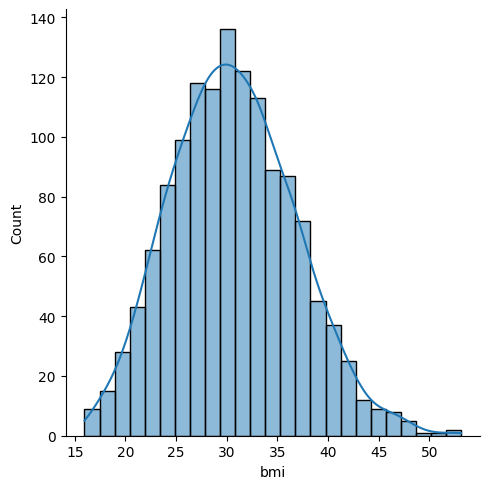

In [76]:
sns.displot(data,x='bmi',kde=True)

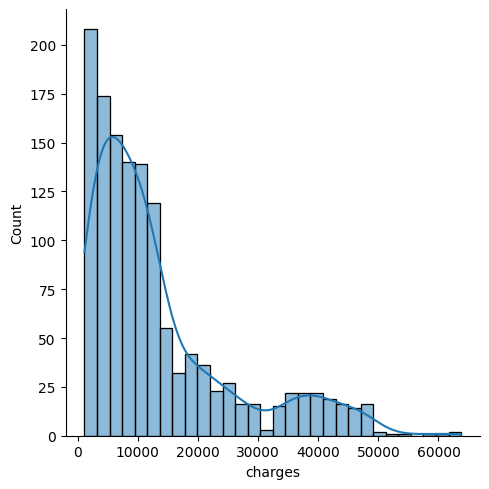

In [77]:
sns.displot(data,x='charges',kde=True)

In [78]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<Axes: xlabel='smoker', ylabel='count'>

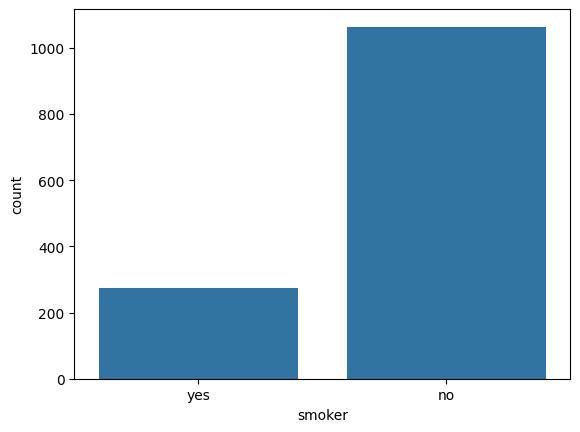

In [80]:
sns.countplot(data,x='smoker')

We need to transform this `charges` to make it more linear

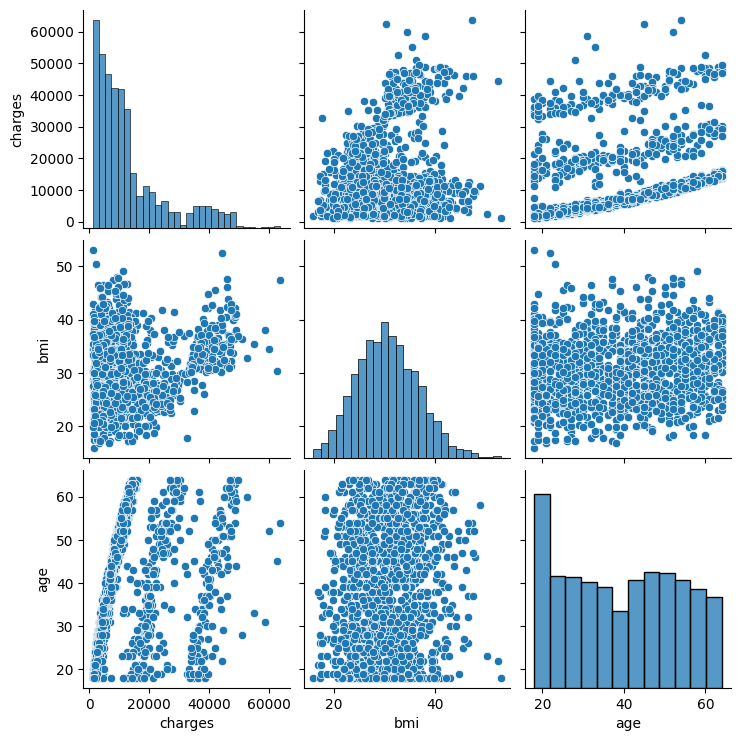

In [81]:
sns.pairplot(data,vars=['charges','bmi','age'])

<Axes: >

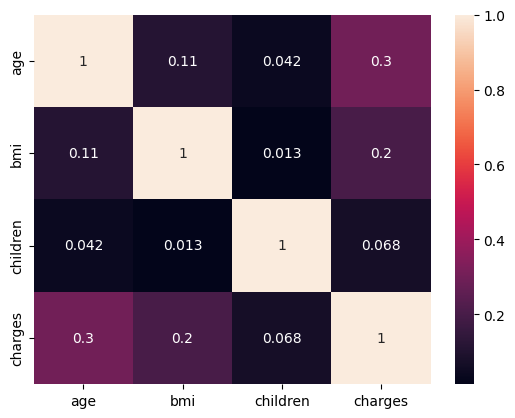

In [82]:
sns.heatmap(data.corr(numeric_only=True),annot=True)

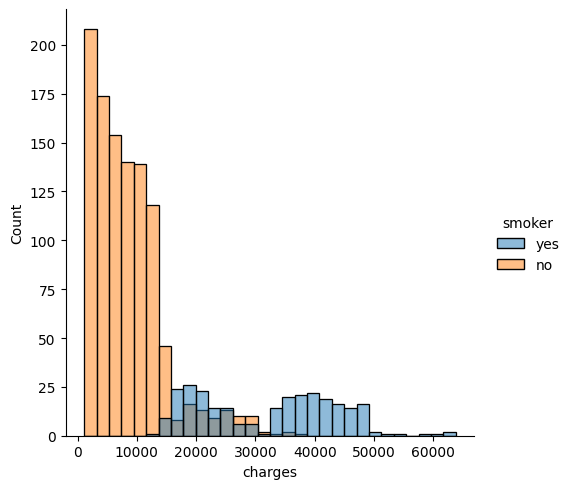

In [83]:
sns.displot(data,x='charges',hue='smoker')

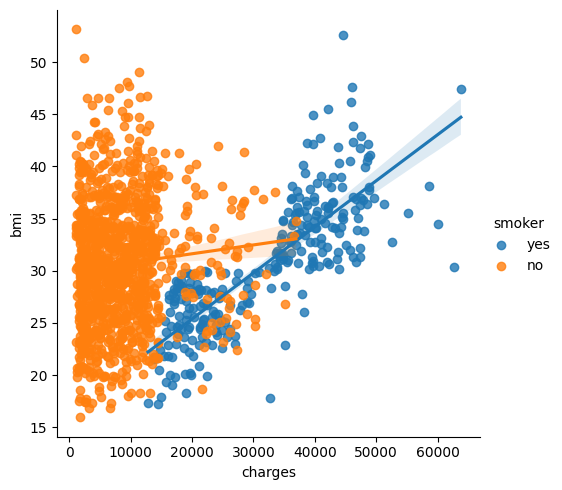

In [84]:
sns.lmplot(data,x='charges',y='bmi',hue='smoker')

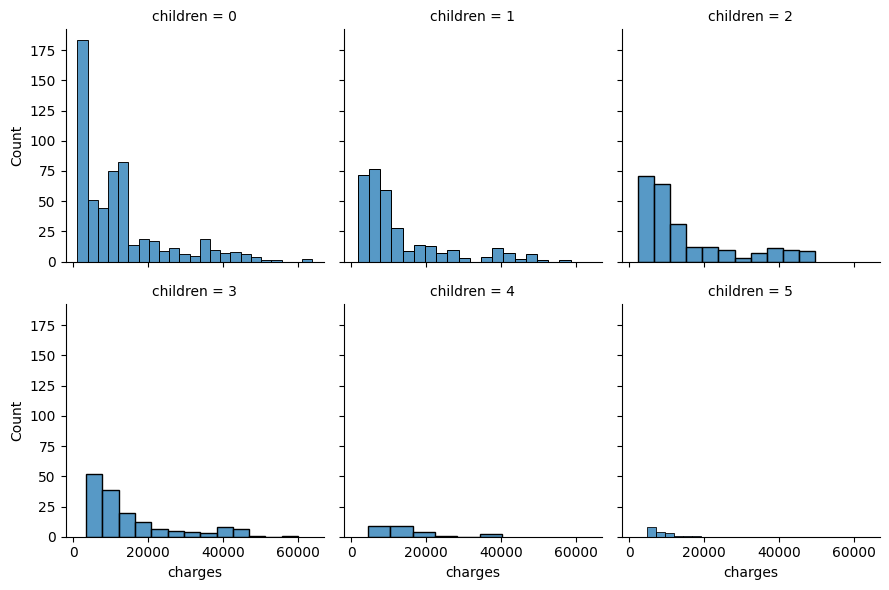

In [85]:
f = sns.FacetGrid(data,col='children',col_wrap=3)
f.map_dataframe(sns.histplot, x="charges")

In [16]:
data = data.join(pd.get_dummies(data[['sex','region','smoker']],drop_first=True))
data.drop(['sex','region','smoker'],axis=1,inplace=True)

In [17]:
data.sample(6)

,age,bmi,children,charges,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes
971,34,23.560,0,4992.37640,False,False,False,False,False
1165,35,26.125,0,5227.98875,False,False,False,False,False
865,40,29.900,2,6600.36100,True,False,False,True,False
699,23,39.270,2,3500.61230,False,False,True,False,False
533,37,36.190,0,19214.70553,True,False,True,False,False
761,23,35.200,1,2416.95500,True,False,False,True,False


<Axes: >

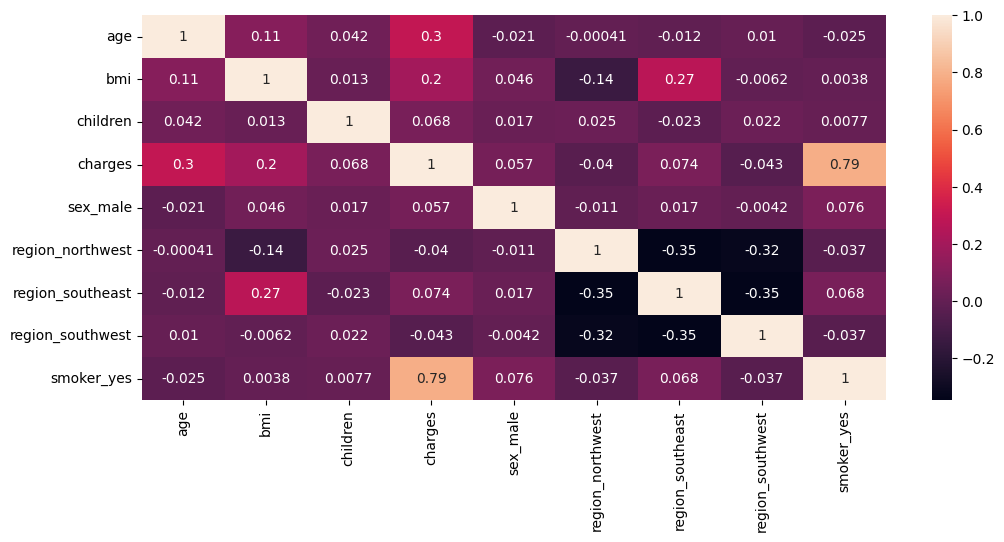

In [18]:
plt.figure(figsize=(12,5))
sns.heatmap(data.corr(),annot=True)

In [19]:
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.compose import ColumnTransformer


ct = ColumnTransformer(
    [('transfrom',PowerTransformer(method='box-cox'),[0,3])]  ,
    remainder='passthrough'
)

data_t = ct.fit_transform(data)

In [ ]:
from random import sample
import math


def transfrom_age(x):
    x = list(x)
   for i in range(0,length(x)):
       u = sample(x,1)
       v = x[i]
       math.sqrt(2*)
       
    

In [66]:
pi = 3.145

<Axes: xlabel='age', ylabel='Count'>

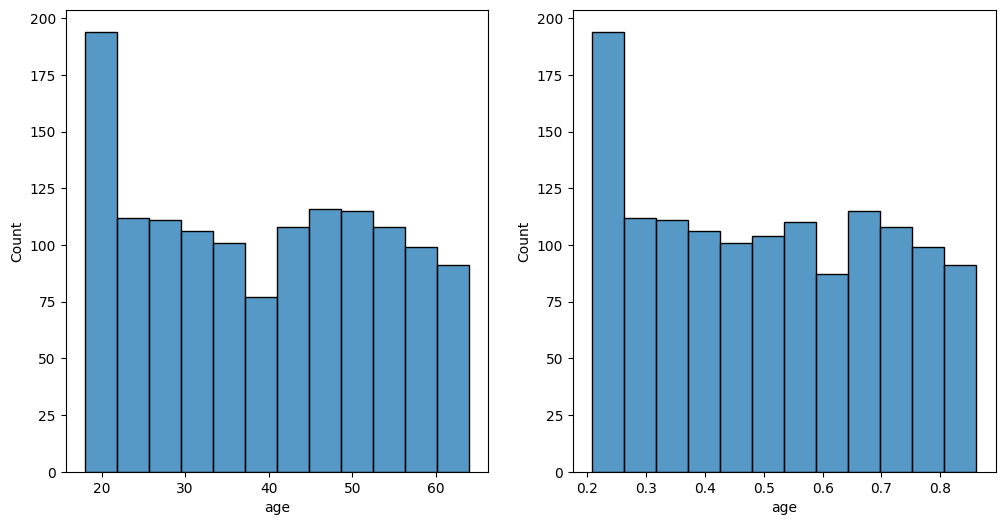

In [94]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.histplot(data['age'],ax=axes[0])
sns.histplot(np.sqrt(np.log(data['age']))*np.sin(2*pi*data['age']),ax=axes[1])

In [20]:
data_n = pd.DataFrame(data_t,columns=(list(data.columns[[0,3]]) + [col for col in data.columns if col not in data.columns[[0,3]]]))

<Axes: xlabel='age', ylabel='Density'>

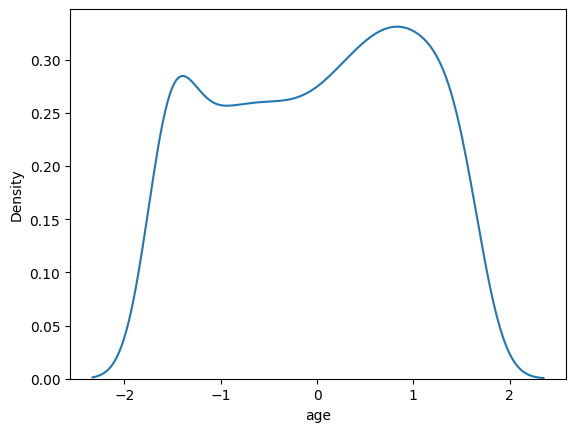

In [21]:
sns.kdeplot(data_n,x='age')

<Axes: xlabel='charges', ylabel='Density'>

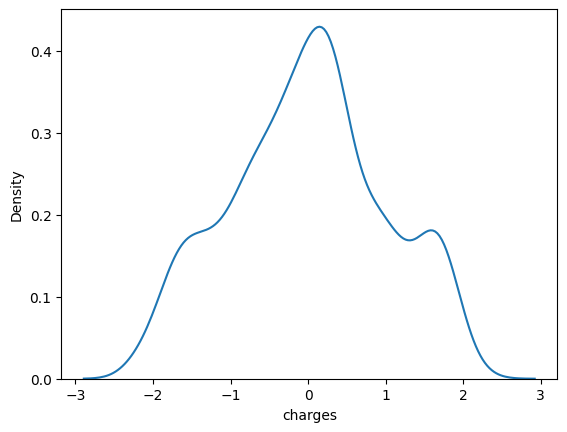

In [22]:
sns.kdeplot(data_n,x='charges')

In [23]:
ct = ColumnTransformer(
    [('scale',StandardScaler(copy=False),[2])],
    remainder = 'passthrough'
)

d = ct.fit_transform(data_n)

In [24]:
df = pd.DataFrame(d,columns = [data_n.columns[2]] + [col for col in data_n.columns if col not in data_n.columns[2]])

In [48]:
df['Age*sm'] = df['age'] * df['smoker_yes']
df['bmi*sm'] = df['bmi'] * df['smoker_yes']

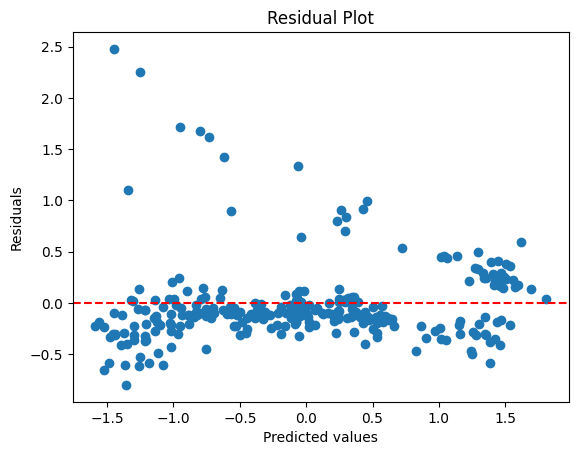

R²: 0.8405
Adjusted R²: 0.8349


In [26]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df[[col for col in df.columns if col not in df.columns[2]]]  
y = df['charges'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate R-squared and adjusted R-squared
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Plot residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

# Print adjusted R²
print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {adjusted_r2:.4f}")


In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, r2_score




X = df[[col for col in df.columns if col not in df.columns[[2,10]]]]  
y = df['charges']

model = LinearRegression()


kf = KFold(n_splits=5, shuffle=True, random_state=42)


cv_results = cross_val_score(model, X, y, cv=kf, scoring=make_scorer(r2_score))

# Display the R² score for each fold and the mean R² score
print("R² scores for each fold:", cv_results)
print("Mean R² score:", cv_results.mean())


R² scores for each fold: [0.85586497 0.80225852 0.85486498 0.79093454 0.81857553]
Mean R² score: 0.8244997099338489


In [27]:
print(pd.DataFrame({
    'Variables' : model.feature_names_in_,
    'Coefficients' : model.coef_
}))

          Variables  Coefficients
0               bmi      0.089790
1               age      0.611775
2          children      0.096443
3          sex_male     -0.068260
4  region_northwest     -0.061071
5  region_southeast     -0.124498
6  region_southwest     -0.147072
7        smoker_yes      1.678567
8            Age*sm     -0.466808


In [29]:
df['age*bmi'] = df['age'] * df['bmi']

In [42]:
df

,bmi,age,charges,children,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes,Age*sm,age*bmi
0,-0.45332,-1.526649,0.681644,0,False,False,False,True,True,-1.526649,0.69206
1,0.509621,-1.619368,-1.748873,1,True,False,True,False,False,-0.0,-0.825264
2,0.383307,-0.761699,-0.768781,3,True,False,True,False,False,-0.0,-0.291964
3,-1.305531,-0.377504,0.978814,0,True,True,False,False,False,-0.0,0.492843
4,-0.292556,-0.452483,-0.91656,0,True,True,False,False,False,-0.0,0.132377
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.050297,0.789252,0.165744,3,True,True,False,False,False,0.0,0.039697
1334,0.206139,-1.619368,-1.498607,0,False,False,False,False,False,-0.0,-0.333815
1335,1.014878,-1.619368,-1.806638,0,False,False,True,False,False,-0.0,-1.643461
1336,-0.797813,-1.34655,-1.594762,0,False,False,False,True,False,-0.0,1.074296


In [50]:
import statsmodels.api as sm

X = df[[col for col in df.columns if col not in df.columns[[2,10]]]]  
y = df['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_t2 = sm.add_constant(X_train)



In [51]:
model = sm.OLS(y_train.astype(float), X_t2.astype(float)).fit()


In [52]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     484.0
Date:                Tue, 24 Sep 2024   Prob (F-statistic):               0.00
Time:                        23:04:25   Log-Likelihood:                -590.03
No. Observations:                1070   AIC:                             1202.
Df Residuals:                    1059   BIC:                             1257.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3146      0.032  

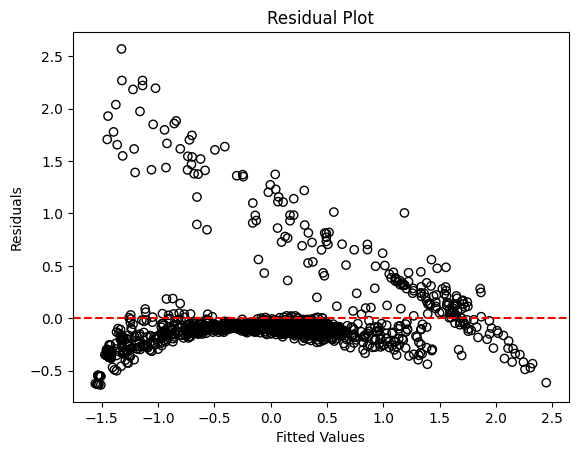

In [53]:
fitted_values = model.fittedvalues  
residuals = model.resid  

plt.scatter(fitted_values, residuals, edgecolors='k', facecolors='none')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [31]:
X_train

,bmi,age,children,sex_male,region_northwest,region_southeast,region_southwest,smoker_yes,Age*sm,age*bmi
560,-1.757474,0.530285,2,False,True,False,False,False,0.0,-0.931961
1285,-1.040599,0.595797,0,False,False,False,False,False,0.0,-0.619985
1142,-0.952015,0.915797,0,False,False,True,False,False,0.0,-0.871852
969,0.599846,0.055618,5,False,False,True,False,False,0.0,0.033362
486,-1.508126,1.04052,3,False,True,False,False,False,0.0,-1.569235
...,...,...,...,...,...,...,...,...,...,...
1095,0.112633,-1.619368,4,False,False,False,False,False,-0.0,-0.182395
1130,-1.114419,0.055618,5,False,False,True,False,False,0.0,-0.061982
1294,-0.900341,1.284864,0,True,False,False,False,False,0.0,-1.156816
860,2.778356,-0.085767,2,False,False,False,True,True,-0.085767,-0.238292


### Interpretation:

Let's break down the key results from your linear regression output and interpret each section:

### 1. **Model Fit:**
   - **R-squared (0.820)**: The model explains 82% of the variance in the dependent variable (`charges`). This suggests a strong model fit.
   - **Adjusted R-squared (0.819)**: After adjusting for the number of predictors, the model still explains 81.9% of the variance, indicating that the added predictors and interaction terms are valuable without overfitting.
   - **F-statistic (484.0) and Prob (F-statistic: 0.00)**: The overall model is statistically significant (p-value < 0.05), meaning at least one predictor has a significant relationship with the target (`charges`).

### 2. **Coefficients:**
Each coefficient represents the expected change in the `charges` variable for a one-unit increase in the corresponding predictor, holding all other variables constant.

- **Intercept (`const`: -0.3146)**: When all predictors are zero, the model predicts that `charges` would be -0.31, but this value is not very interpretable on its own.
  
- **BMI (`bmi`: 0.0099, p = 0.517)**: BMI has a small positive relationship with charges, but the coefficient is not statistically significant (p-value > 0.05). This means BMI alone is not a significant predictor of medical charges in this model.

- **Age (`age`: 0.6216, p = 0.000)**: For every one-year increase in age, `charges` increase by 0.6216 units, and this effect is highly significant.

- **Children (`children`: 0.0984, p = 0.000)**: Each additional child increases the expected charges by 0.0984 units, and this is statistically significant.

- **Sex (`sex_male`: -0.0886, p = 0.001)**: Being male reduces expected charges by 0.0886 units compared to females, and this is statistically significant.

- **Regions**:
   - **Region_northwest (`-0.0718`, p = 0.052)**: Living in the northwest has a small negative effect on charges, but it is **marginally significant**.
   - **Region_southeast (`-0.1360`, p = 0.000)**: Living in the southeast significantly reduces charges.
   - **Region_southwest (`-0.1654`, p = 0.000)**: Similarly, living in the southwest also significantly reduces charges.
   
- **Smoker (`smoker_yes`: 1.6865, p = 0.000)**: Being a smoker drastically increases charges by 1.6865 units, which is highly significant. Smoking seems to be one of the largest determinants of medical charges.

### 3. **Interaction Terms**:
   - **Age * Smoker (`Age*sm`: -0.4964, p = 0.000)**: This interaction suggests that the effect of age on charges is **reduced for smokers**. While age normally increases charges, for smokers, the charges increase at a slower rate with age.
   
   - **BMI * Smoker (`bmi*sm`: 0.3691, p = 0.000)**: This interaction indicates that higher BMI has a **more positive effect on charges for smokers** than for non-smokers. The combination of smoking and a higher BMI leads to even higher medical charges.

### 4. **Model Diagnostics:**
   - **Omnibus and Jarque-Bera tests**: Both tests for normality of residuals have p-values of 0.000, indicating that the residuals are **not normally distributed**. This could suggest potential model issues or that certain assumptions of linear regression (like normality of residuals) are violated.
   
   - **Skewness (3.040) and Kurtosis (13.362)**: The high skew and kurtosis values suggest that the distribution of residuals is far from normal, with long tails and possible outliers.

   - **Durbin-Watson (2.108)**: This value close to 2 indicates that there is **no strong autocorrelation** in the residuals, meaning the errors are independent.

### Conclusion:
- The model seems to fit the data well with an R-squared of 0.820 and adjusted R-squared of 0.819.
- Age, number of children, sex, smoking status, and regions (southeast and southwest) are significant predictors of medical charges.
- The interaction between age and smoking status indicates that the effect of age on charges is moderated by whether a person smokes, while higher BMI amplifies the impact of smoking on charges.
- However, some diagnostic statistics suggest potential non-normality in the residuals, which might require further investigation or a more complex model to address these issues.
